In [1325]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [1326]:
def generate_data(number_of_samples=100, margin=0.5, seed=21):
    number_of_samples_per_class = number_of_samples //2

    rng = np.random.default_rng(seed=seed)

    x1 = (rng.random(number_of_samples_per_class) * 2 - 1) / 2 - margin
    y1 = (rng.random(number_of_samples_per_class) * 2 - 1) / 2 + margin

    x2 = (rng.random(number_of_samples_per_class) * 2 - 1) / 2 + margin
    y2 = (rng.random(number_of_samples_per_class) * 2 - 1) / 2 - margin
    
    X1 = np.column_stack((x1, y1))
    X2 = np.column_stack((x2, y2))
    X = np.vstack((X1, X2))
    y = np.hstack((np.ones(shape=number_of_samples_per_class), -np.ones(shape=number_of_samples_per_class)))

    data = np.empty((number_of_samples_per_class*2, 4))
    data[:, 0] = np.ones(shape=data.shape[0])
    data[:, 1] = X[:, 0]
    data[:, 2] = X[:, 1]
    data[:, 3] = y


    return data

def generate_data2(m, margin):
    from sklearn.datasets import make_blobs
    X, y = make_blobs(
        n_samples=m, centers=2, n_features=2, center_box=(0, 10), random_state=21908859
    )

    y[y == 0] = -1

    data = np.empty(shape=(m, 4))
    data[:, 0] = 1
    data[:, (1, 2)] = X
    data[:, 3] = y

    return data

In [1327]:
def accuracy(y, predictions):
    return np.sum(y == predictions) / y.size

In [1328]:
class SimplePerceptron:
    def __init__(self, training_rate=0.1, max_number_of_iterations=100, seed=None):
        self.training_rate = training_rate
        self.max_number_of_iterations = max_number_of_iterations
        self.weights = None
        self.number_of_steps = None

        if seed is not None:
            self.rng = np.random.default_rng(seed=seed)
        else:
            self.rng = np.random.default_rng()



    def fit(self, X, y):
        if set(np.unique(y)) != {-1, 1}:
            raise ValueError("Class labels in y must be -1 or 1.")

        self.weights = np.zeros(shape=X.shape[1])
        self.number_of_steps = 0

        for i in range(self.max_number_of_iterations):
            predictions = np.sign(np.dot(X, self.weights))
            misclassified = (y != predictions)
            misclassified_indices = np.flatnonzero(misclassified)

            if misclassified_indices.size == 0:
                break
            

            random_misclassified_index = self.rng.choice(misclassified_indices)
            self.weights = self.weights + self.training_rate * y[random_misclassified_index] * X[random_misclassified_index]
            self.number_of_steps += 1

        return self.weights, self.number_of_steps
    
    def decision_function(self, X):
        return np.sign(np.dot(X, self.weights))
    
    def predict(self, X):
        predictions = self.decision_function(X)
        return predictions


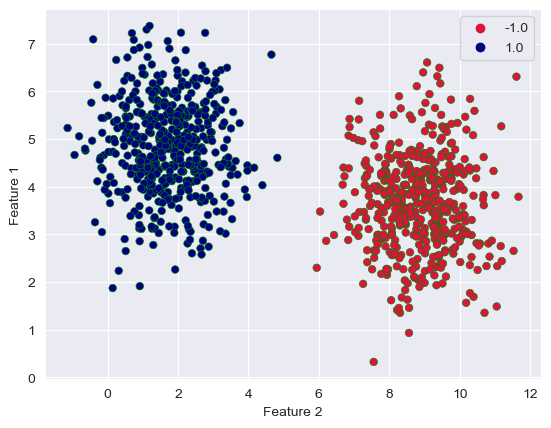

In [1329]:
number_of_samples = 1000
margin = 0.5 # min 0.5

# data = generate_data(number_of_samples=number_of_samples, margin=margin, seed=21)
data = generate_data2(number_of_samples, margin)

plt.ylabel('Feature 1')
plt.xlabel('Feature 2')
sns.set_style('darkgrid')
sns.scatterplot(x=data[:, 1], y=data[:, 2], hue=data[:, 3], palette=['Crimson', 'Navy'], edgecolor='g', s=30);

In [1330]:
X_train, X_test, y_train, y_test = train_test_split(data[:, 0:3], data[:, -1], test_size=0.2, random_state=212121)

perceptron = SimplePerceptron(training_rate=0.01, max_number_of_iterations=10000, seed=21)
weights, number_of_steps = perceptron.fit(X_train, y_train)

print(f'Number of steps: {number_of_steps}\n'
      f'Weights: {weights}')




Number of steps: 17
Weights: [ 0.05       -0.14889449  0.1617332 ]


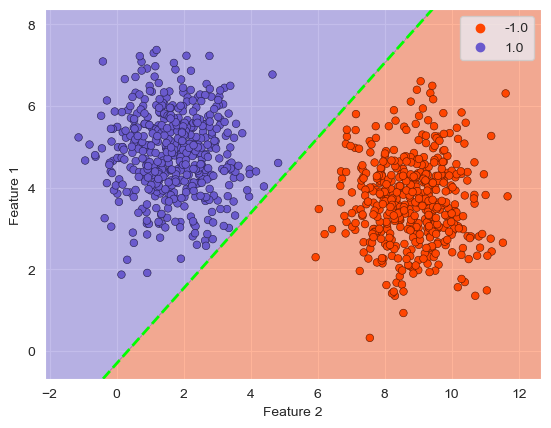

In [1351]:
plt.ylabel('Feature 1')
plt.xlabel('Feature 2')
sns.set_style('darkgrid')
sns.scatterplot(x=data[:, 1], y=data[:, 2], hue=data[:, 3], palette=['orangered', 'slateblue'], edgecolor='k', s=30);

w0, w1, w2 = weights
X = data[:, 1:3]
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.01), np.arange(x2_min, x2_max, 0.01))
decision_boundary = w0 + w1 * xx1 + w2 * xx2
plt.contour(xx1, xx2, decision_boundary, levels=[0], linewidths=2, colors='lime', linestyles='dashed');
plt.contourf(xx1, xx2, decision_boundary, levels=[-np.inf, 0, np.inf], colors=['orangered', 'slateblue'], alpha=0.4);

    # xx1, xx2: Dwuwymiarowe tablice numpy stworzone za pomocą np.meshgrid, reprezentujące siatkę punktów w przestrzeni cech.
    # decision_boundary: Wartości decyzji dla każdego punktu na siatce. Jest to wyrażenie matematyczne granicy decyzyjnej perceptronu, tj. w0+w1⋅x1+w2⋅x2w0​+w1​⋅x1​+w2​⋅x2​.
    # levels: Poziomy, na których rysowane są kontury. W tym przypadku chcemy, aby kontur był rysowany dokładnie na poziomie 0, co odpowiada granicy decyzyjnej perceptronu.
    # linewidths: Grubość linii konturu.
    # colors: Kolor konturu, w tym przypadku czerwony.

In [1352]:
predictions = perceptron.predict(X_test)

_accuracy = accuracy(y_test, predictions)
print(f'Accuracy: {_accuracy}')

Accuracy: 1.0
